In [5]:
class dictt():
    def __init__(self):
        self.model = {'Key':2}
        self.bduf = 88
    def update(self):
        self.model['bct'] = 99
    def change(self):
        self.model['Key'] = 888

    def cut(self):
        self.bduf -= 50
    def cutplus(self):
        self.cut()
        self.bduf += 100000

In [1]:
a2 = None

In [3]:
if a2:
    print('111111111111')

In [6]:
abc = dictt()

In [7]:
abc.bduf

88

In [8]:
abc.cutplus()

In [9]:
abc.bduf

100038

In [24]:
for k,c in abc.model.items():
    print('k',k)
    print('c',c)

k Key
c 2
k bct
c 99


In [25]:
abc.change()

In [27]:
for k,c in abc.model.items():
    print('k value',k)
    print('c value',c)

k value Key
c value 888
k value bct
c value 99


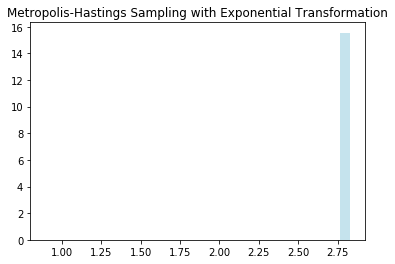

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (unnormalized)
def target_distribution(x):
    return np.exp(-0.5 * x**2)  # Example: Normal distribution

# Proposal distribution: Normal distribution
def proposal_distribution(x, sigma):
    return np.random.normal(x, sigma)

# Metropolis-Hastings algorithm with exponential transformation
def mh_sampling(iterations, sigma, initial_value):
    samples = np.zeros(iterations)
    current_value = initial_value

    for i in range(iterations):
        # Propose a new sample
        proposed_value = proposal_distribution(current_value, sigma)
        
        # Apply exponential transformation to ensure non-negativity
        proposed_value = np.exp(proposed_value)

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_value) / target_distribution(current_value))

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        # Save the current sample
        samples[i] = current_value

    return samples

# Example usage:
np.random.seed(123)
iterations = 100000
sigma = 0.1
initial_value = np.log(1.0)  # Initial value after inverse exponential transform

samples = mh_sampling(iterations, sigma, initial_value)

# Plot the samples
plt.hist(samples, bins=30, density=True, color='lightblue', alpha=0.7)
plt.title('Metropolis-Hastings Sampling with Exponential Transformation')
plt.show()


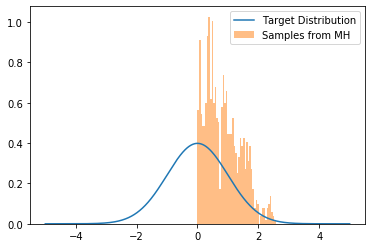

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 目标分布 p(x)
def target_distribution(x):
    # 以简单的正态分布为例
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# 截断正态分布采样
def truncated_normal_sampler(mu, sigma):
    y = np.random.normal(mu, sigma)
    while y < 0:  # 截断，确保生成的样本非负
        y = np.random.normal(mu, sigma)
    return y

# Metropolis-Hastings 采样
def metropolis_hastings(num_samples, initial_x, proposal_sigma):
    samples = [initial_x]
    current_x = initial_x

    for _ in range(num_samples):
        # 从提议分布 Q(· | x) 中采样
        proposed_x = truncated_normal_sampler(current_x, proposal_sigma)

        # 计算接受概率
        acceptance_ratio = min(1, target_distribution(proposed_x) / target_distribution(current_x))

        # 判断是否接受新样本
        if np.random.uniform(0, 1) < acceptance_ratio:
            current_x = proposed_x

        samples.append(current_x)

    return samples

# 参数设置
num_samples = 1000
initial_value = 0.0
proposal_stdev = 1.0

# 进行 Metropolis-Hastings 采样
samples = metropolis_hastings(num_samples, initial_value, proposal_stdev)

# 绘制采样结果和目标分布对比
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples from MH')
plt.legend()
plt.show()

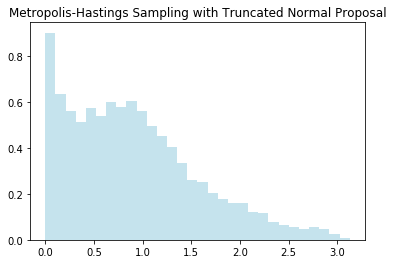

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution (unnormalized)
def target_distribution(x):
    return np.exp(-0.5 * x**2)  # Example: Normal distribution

# Proposal distribution: Truncated normal distribution
def proposal_distribution(x, sigma):
    # Truncate the normal distribution at 0 to ensure non-negativity
    return max(0, np.random.normal(x, sigma))

# Metropolis-Hastings algorithm with truncated normal proposal
def mh_sampling(iterations, sigma, initial_value):
    samples = np.zeros(iterations)
    current_value = initial_value

    for i in range(iterations):
        # Propose a new sample
        proposed_value = proposal_distribution(current_value, sigma)

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_value) / target_distribution(current_value))

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        # Save the current sample
        samples[i] = current_value

    return samples

# Example usage:
np.random.seed(123)
iterations = 10000
sigma = 0.1
initial_value = 1.0

samples = mh_sampling(iterations, sigma, initial_value)

# Plot the samples
plt.hist(samples, bins=30, density=True, color='lightblue', alpha=0.7)
plt.title('Metropolis-Hastings Sampling with Truncated Normal Proposal')
plt.show()

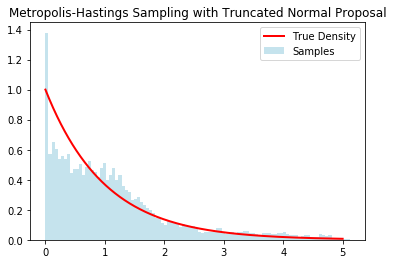

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (unnormalized)
def target_distribution(x):
    return np.exp(-x)

# Proposal distribution: Truncated normal distribution
def proposal_distribution(x, sigma):
    return max(0, np.random.normal(x, sigma))

# Metropolis-Hastings algorithm with truncated normal proposal
def mh_sampling(iterations, sigma, initial_value):
    samples = np.zeros(iterations)
    current_value = initial_value

    for i in range(iterations):
        # Propose a new sample
        proposed_value = proposal_distribution(current_value, sigma)

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_value) / target_distribution(current_value))

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        # Save the current sample
        samples[i] = current_value

    return samples

# Plot the target distribution (correct density)
x = np.linspace(0, 5, 1000)
true_density = np.exp(-x)

# Example usage:
np.random.seed(123)
iterations = 10000
sigma = 0.1
initial_value = 0.4

samples = mh_sampling(iterations, sigma, initial_value)

# Plot the samples and the true density
plt.hist(samples, bins=100, density=True, color='lightblue', alpha=0.7, label='Samples')
plt.plot(x, true_density, label='True Density', color='red', linewidth=2)
plt.title('Metropolis-Hastings Sampling with Truncated Normal Proposal')
plt.legend()
plt.show()

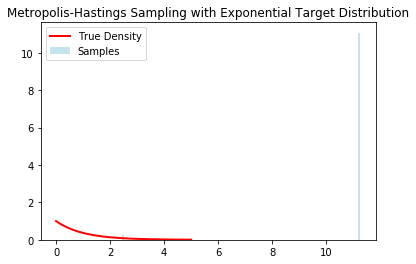

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (unnormalized): Exponential distribution
def target_distribution(x):
    if x < 0:
        return 0
    else:
        return np.exp(-x)

# Proposal distribution: Normal distribution
def proposal_distribution(x, sigma):
    return np.random.normal(x, sigma)

# Metropolis-Hastings algorithm with exponential transform
def mh_sampling(iterations, sigma, initial_value):
    samples = np.zeros(iterations)
    current_value = initial_value

    for i in range(iterations):
        # Propose a new sample
        proposed_value = np.exp(proposal_distribution(current_value, sigma))
        # if proposed_value < 0:
        #     print(proposed_value)

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_value) / target_distribution(current_value))

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        # Save the current sample
        samples[i] = current_value

    return samples

# Plot the target distribution (correct density)
x = np.linspace(0, 5, 1000)
true_density = np.exp(-x)

# Example usage:
np.random.seed(123)
iterations = 10000
sigma = 0.1
initial_value = 1.0

samples = mh_sampling(iterations, sigma, initial_value)

# Plot the samples and the true density
plt.hist(samples, bins=100, density=True, color='lightblue', alpha=0.7, label='Samples')
plt.plot(x, true_density, label='True Density', color='red', linewidth=2)
plt.title('Metropolis-Hastings Sampling with Exponential Target Distribution')
plt.legend()
plt.show()